In [14]:
import pandas as pd
import glob

# Step 1: Load all CSV files in a directory
path = "E:\\VSCODE\\NIFTY50 DATA\\L&T\\"  # update with your path
csv_files = glob.glob(path + "*.csv")

# Step 2: Read each CSV into a pandas DataFrame and store in a list
data_frames = [pd.read_csv(file) for file in csv_files]

# Step 3: Merge DataFrames on common columns (like DateTime)
# Assuming each CSV has a 'DateTime' column for the OHLC data
merged_df = pd.concat(data_frames, ignore_index=True)

# Step 4: Remove duplicate rows based on 'DateTime' column if needed
merged_df.drop_duplicates(subset=['Date'], keep='last', inplace=True)

# Step 5: Optionally sort by 'DateTime'
merged_df.sort_values(by='Date', inplace=True)

# Step 6: Save the merged dataframe to a new CSV
merged_df.to_csv("LT_Data.csv", index=False)

# Print the result
print(merged_df.head())


                                                    Date     Open     High  \
60699  Fri Apr 01 2022 09:15:00 GMT+0530 (India Stand...  1759.00  1770.00   
60700  Fri Apr 01 2022 09:20:00 GMT+0530 (India Stand...  1769.95  1774.10   
60701  Fri Apr 01 2022 09:25:00 GMT+0530 (India Stand...  1773.00  1773.45   
60702  Fri Apr 01 2022 09:30:00 GMT+0530 (India Stand...  1770.65  1772.40   
60703  Fri Apr 01 2022 09:35:00 GMT+0530 (India Stand...  1771.50  1774.00   

           Low    Close  % Change  % Change vs Average  Volume  
60699  1759.00  1769.95      0.12                 0.13  56,389  
60700  1769.25  1773.50      0.20                 0.21  33,177  
60701  1769.90  1771.00     -0.14                -0.14  15,672  
60702  1769.00  1771.55      0.03                 0.04  11,823  
60703  1770.80  1773.75      0.12                 0.13  12,435  


In [15]:
import pandas as pd

# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv("E:\\VSCODE\\LT_Data.csv")

# Step 2: Remove the 'GMT+0530 (India Standard Time)' part and keep only the timestamp with the offset
df['Date'] = df['Date'].str.replace(' GMT\\+0530 \\(India Standard Time\\)', '', regex=True)

# Step 3: Convert the 'Date' column to a pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 4: Sort the DataFrame by 'Date' in ascending order (latest last)
df_sorted = df.sort_values(by='Date')

# Step 5: Save the sorted DataFrame back to a CSV file (optional)
df_sorted.to_csv("E:\\VSCODE\\sorted_LT_Data.csv", index=False)

# Print the sorted DataFrame
print(df_sorted.head())

                     Date    Open     High      Low    Close  % Change  \
47165 2018-12-20 14:45:00  1450.3  1450.95  1449.10  1450.00     -0.02   
47166 2018-12-20 14:50:00  1450.3  1450.40  1445.40  1446.00     -0.28   
47167 2018-12-20 14:55:00  1446.0  1450.80  1445.50  1449.85      0.27   
47168 2018-12-20 15:00:00  1449.8  1450.50  1449.30  1449.45     -0.03   
47169 2018-12-20 15:05:00  1449.5  1450.80  1449.35  1450.80      0.09   

       % Change vs Average  Volume  
47165                -0.02  50,794  
47166                -0.27  40,802  
47167                 0.27  66,499  
47168                -0.02  52,884  
47169                 0.10  61,037  


In [2]:
import pandas as pd
import glob
import os  # Import os for better file path handling

# Step 1: Define the path to the folder containing the CSV files
path = "E:\\VSCODE\\NIFTY50 DATA\\All Data\\"  # Replace with the actual path

# Step 2: Use glob to find all CSV files in the directory
csv_files = glob.glob(path + "*.csv")

# Step 3: Create an empty list to hold DataFrames
data_frames = []

# Step 4: Loop over each CSV file, add a stock identifier, and read it into a DataFrame
for file in csv_files:
    # Use os.path.basename to get just the file name and remove the extension to get the stock name
    stock_name = os.path.basename(file).split('.')[0]
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Add a new column for the stock name
    df['Stock'] = stock_name
    
    # Append the DataFrame to the list
    data_frames.append(df)

# Step 5: Concatenate all DataFrames into one
combined_df = pd.concat(data_frames, ignore_index=True)

# Step 6: Save the combined DataFrame to a new CSV file
combined_df.to_csv("stocks_data.csv", index=False)

# Step 7: Print the first few rows of the combined DataFrame
print(combined_df.head())


                  Date     Open     High      Low    Close  % Change  \
0  2018-12-31 13:15:00  1061.00  1062.50  1061.00  1061.90      0.08   
1  2018-12-31 13:20:00  1061.85  1062.50  1061.75  1062.00      0.01   
2  2018-12-31 13:25:00  1062.00  1063.00  1061.75  1062.80      0.08   
3  2018-12-31 13:30:00  1062.65  1063.05  1061.50  1061.75     -0.10   
4  2018-12-31 13:35:00  1061.75  1062.75  1060.85  1062.60      0.08   

   % Change vs Average  Volume     Stock  
0                 0.09  16,725  HDFCBank  
1                 0.01  15,634  HDFCBank  
2                 0.08  16,537  HDFCBank  
3                -0.10   9,335  HDFCBank  
4                 0.08  17,862  HDFCBank  


In [1]:
import pandas as pd

df=pd.read_csv('E:\\VSCODE\\stocks_data.csv')
df.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
% Change               0
% Change vs Average    0
Volume                 0
Stock                  0
dtype: int64

In [2]:
# Convert Date to datetime format with correct format specification
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, format='%d-%m-%Y %H:%M')

# Sort values by date
df = df.sort_values(by='Date')


In [13]:
import pandas as pd
import ta  # or import pandas_ta as ta for pandas-ta

# Load data
df = pd.read_csv("E:\\VSCODE\\stocks_data.csv", parse_dates=["Date"])

# Example technical indicators
df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)
df['MACD'] = ta.trend.macd(df['Close'])


In [14]:
df.dropna(inplace=True)  # Drops rows with any NaN values

In [23]:
from sklearn.preprocessing import StandardScaler

df['Volume'] = df['Volume'].replace({',': ''}, regex=True).astype(float)

# Select columns to scale (technical indicators, price, volume, etc.)
features_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'EMA_20', 'RSI', 'MACD']

# Use MinMaxScaler or StandardScaler
scaler = StandardScaler()  # Or StandardScaler()

# Fit and transform the selected columns
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df.head())


                  Date      Open      High       Low     Close  % Change  \
25 2019-01-02 15:15:00 -1.031857 -1.032717 -1.032426 -1.032079     -0.01   
26 2019-01-02 15:15:00 -1.488717 -1.489803 -1.489781 -1.489523     -0.09   
27 2019-01-02 15:15:00 -0.609579 -0.611118 -0.609625 -0.609567      0.00   
28 2019-01-02 15:15:00 -1.052234 -1.052380 -1.052587 -1.051292      0.04   
29 2019-01-02 15:15:00 -0.028184 -0.028895 -0.029497 -0.028228      0.04   

    % Change vs Average    Volume    SMA_20    EMA_20  ...      MACD  \
25                -0.01 -0.287108 -1.448640 -1.424211  ...  0.872511   
26                -0.09  0.487878 -1.448655 -1.531543  ... -0.194052   
27                 0.01 -0.136208 -1.449001 -1.485110  ...  0.255633   
28                 0.03  0.611280 -1.449051 -1.515156  ... -0.039068   
29                 0.04 -0.088882 -1.449171 -1.375454  ...  1.222258   

    Day_of_week  Month  Hour  Day_of_year  Stock_HDFCBank  Stock_Infosys  \
25            2      1    15      

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M')

# Extracting time-based features
df['Day_of_week'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['Month'] = df['Date'].dt.month  # 1=January, 12=December
df['Hour'] = df['Date'].dt.hour  # Hour of the day
df['Day_of_year'] = df['Date'].dt.dayofyear  # Day of the year


In [21]:
# One-Hot Encoding for 'Stock'
df = pd.get_dummies(df, columns=['Stock'])


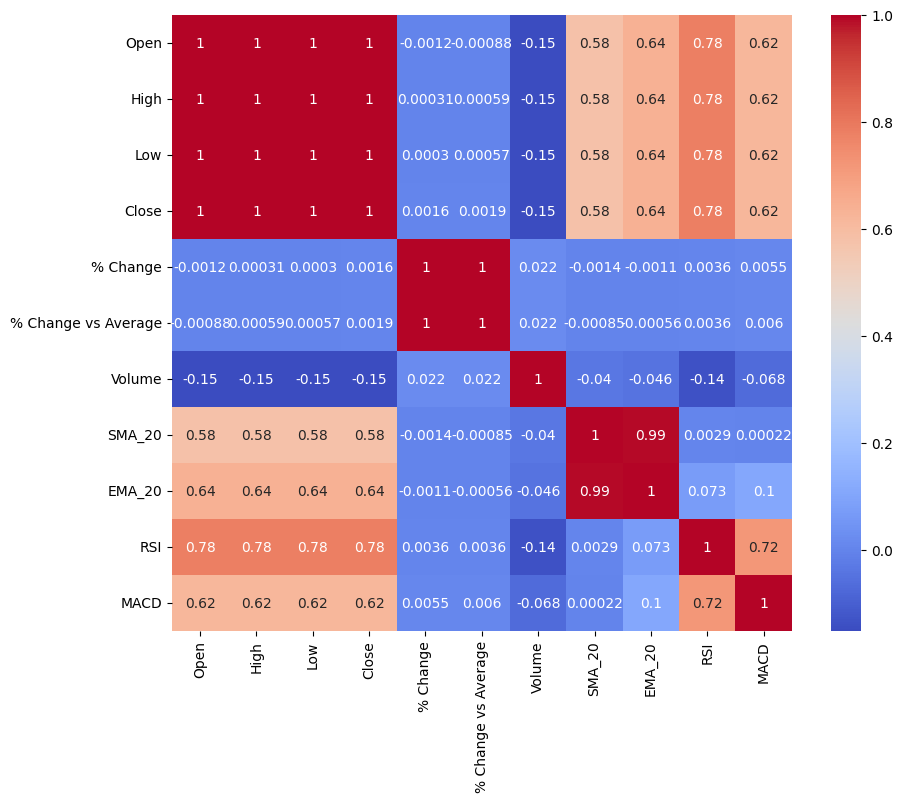

In [24]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [1]:
import numpy as np
import time
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import pandas as pd
import gym
from gym import spaces
from collections import deque
import random

# Load preprocessed stock data
df = pd.read_csv("E:\\VSCode\\preprocessed_stocks_data.csv")
stock_groups = df.groupby('Stock')
stock_data_dict = {stock: group.drop(columns=['Stock', 'Date']) for stock, group in stock_groups}

In [2]:
# Assuming `df` is your stock data DataFrame

# Split each stock's data into training and testing sets (80% training, 20% testing)
train_data = {}
test_data = {}

for stock, stock_data in stock_data_dict.items():
    # Split data into training and testing
    train_size = int(len(stock_data) * 0.8)
    train_data[stock] = stock_data.iloc[:train_size]
    test_data[stock] = stock_data.iloc[train_size:]


In [3]:
# Define StockTradingEnv with continuous action space
class StockTradingEnv(gym.Env):
    def __init__(self, stock_data):
        super(StockTradingEnv, self).__init__()
        self.stock_data = stock_data.reset_index(drop=True)
        self.current_step = 0

        # Define action space as continuous
        self.action_space = spaces.Box(low=-1, high=1, shape=(1,), dtype=np.float32)  # Range [-1, 1]
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(len(stock_data.columns),), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        initial_state = self.stock_data.iloc[self.current_step].values
        return initial_state.astype(np.float32)

    def step(self, action):
        action = action[0]  # Extract action from array
        state = self.stock_data.iloc[self.current_step].values.astype(np.float32)
        
        # Calculate reward based on action, but ensure we don't go out of bounds
        if self.current_step < len(self.stock_data) - 1:
            next_close = self.stock_data.iloc[self.current_step + 1]['Close']
            current_close = self.stock_data.iloc[self.current_step]['Close']
        else:
            next_close = current_close = self.stock_data.iloc[self.current_step]['Close']

        # Translate continuous action to discrete buy/sell/hold decision
        if action > 0.5:
            reward = next_close - current_close
        elif action < -0.5:
            reward = current_close - next_close
        else:
            reward = 0  # Hold
        
        self.current_step += 1
        done = self.current_step >= len(self.stock_data) - 1
        next_state = self.stock_data.iloc[self.current_step].values.astype(np.float32) if not done else state

        return next_state, reward, done, {}

    def render(self):
        pass


In [4]:
# Initialize environments for each stock
envs = {stock: StockTradingEnv(stock_data) for stock, stock_data in stock_data_dict.items()}

In [5]:
# Define DDPG network builders and agent class
def build_actor(state_shape):
    input_layer = tf.keras.layers.Input(shape=state_shape)
    x = tf.keras.layers.Dense(256, activation="relu")(input_layer)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    output_layer = tf.keras.layers.Dense(1, activation="tanh")(x)  # Output continuous action
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

def build_critic(state_shape, action_shape):
    state_input = tf.keras.layers.Input(shape=state_shape)
    action_input = tf.keras.layers.Input(shape=(action_shape,))
    x = tf.keras.layers.Concatenate()([tf.keras.layers.Flatten()(state_input), action_input])
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    output_layer = tf.keras.layers.Dense(1, activation="linear")(x)
    model = tf.keras.Model(inputs=[state_input, action_input], outputs=output_layer)
    return model

In [6]:
class ReplayBuffer:
    def __init__(self, max_size=100000):
        self.buffer = deque(maxlen=max_size)
        
    def add(self, experience):
        self.buffer.append(experience)
        
    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        return map(np.array, zip(*batch))
        
    def size(self):
        return len(self.buffer)

In [7]:
class DDPGAgent:
    def __init__(self, state_shape, action_shape):
        self.actor = build_actor(state_shape)
        self.critic = build_critic(state_shape, action_shape)
        self.target_actor = build_actor(state_shape)
        self.target_critic = build_critic(state_shape, action_shape)
        
        self.target_actor.set_weights(self.actor.get_weights())
        self.target_critic.set_weights(self.critic.get_weights())
        
        self.replay_buffer = ReplayBuffer()
        
        self.gamma = 0.99
        self.tau = 0.005
        self.actor_lr = 0.001
        self.critic_lr = 0.002
        self.batch_size = 64
        
        self.actor_optimizer = Adam(self.actor_lr)
        self.critic_optimizer = Adam(self.critic_lr)

    def update(self):
        if self.replay_buffer.size() < self.batch_size:
            return None  # No update if buffer is too small

        # Sample from the replay buffer
        states, actions, rewards, next_states, dones = self.replay_buffer.sample(self.batch_size)

        # Reshape rewards and dones to ensure they are (batch_size, 1)
        rewards = rewards.reshape(-1, 1)
        dones = dones.reshape(-1, 1)

        # Remove the unnecessary dimensions
        states = states.reshape(self.batch_size, -1)  # Shape (batch_size, state_dim)
        next_states = next_states.reshape(self.batch_size, -1)  # Shape (batch_size, state_dim)

        # Update Critic
        with tf.GradientTape() as tape:
            target_actions = self.target_actor(next_states)
            target_q_values = self.target_critic([tf.convert_to_tensor(next_states), target_actions])
            expected_q_values = rewards + self.gamma * (1 - dones) * target_q_values
            q_values = self.critic([states, actions])

            # Critic loss
            critic_loss = tf.reduce_mean(tf.square(q_values - expected_q_values))

        # Backpropagate critic gradients
        critic_grads = tape.gradient(critic_loss, self.critic.trainable_variables)
        self.critic_optimizer.apply_gradients(zip(critic_grads, self.critic.trainable_variables))

        # Actor Update
        with tf.GradientTape() as tape:
            actions = self.actor(states)  # The action from the actor for each state
            actor_loss = -tf.reduce_mean(self.critic([tf.convert_to_tensor(states, dtype=tf.float32), actions]))

        # Backpropagate actor gradients
        actor_grads = tape.gradient(actor_loss, self.actor.trainable_variables)
        self.actor_optimizer.apply_gradients(zip(actor_grads, self.actor.trainable_variables))

        # Soft Update Target Networks
        self.soft_update(self.target_actor, self.actor)
        self.soft_update(self.target_critic, self.critic)

        # Return losses for tracking
        return critic_loss.numpy(), actor_loss.numpy()


    def soft_update(self, target_model, source_model):
        target_weights = target_model.get_weights()
        source_weights = source_model.get_weights()
        for i in range(len(target_weights)):
            target_weights[i] = self.tau * source_weights[i] + (1 - self.tau) * target_weights[i]
        target_model.set_weights(target_weights)

In [8]:
# Initialize agents for each stock environment
agents = {stock: DDPGAgent(env.observation_space.shape, 1) for stock, env in envs.items()}

In [12]:
epochs = 100
steps_per_epoch = 1000
# Initialize lists to track metrics
epoch_rewards = []
epoch_losses = []
epoch_accuracies = []

for epoch in range(epochs):
    print(f"Starting epoch {epoch + 1}/{epochs}")
    total_rewards = 0  # Total rewards across all environments in the epoch
    losses = []  # To track loss values across updates
    correct_actions = 0  # Track "correct" actions for a custom accuracy metric
    total_actions = 0  # Count total actions to calculate accuracy

    # Initialize a progress bar for the current epoch
    with tqdm(total=steps_per_epoch, desc=f"Epoch {epoch + 1}/{epochs}", leave=True) as progress_bar:
        for stock, env in envs.items():
            agent = agents[stock]
            state = env.reset().reshape(1, -1)
            done = False
            step_count = 0
            while not done and step_count < steps_per_epoch:
                # Predict an action using the actor
                action = agent.actor.predict(state)
                next_state, reward, done, _ = env.step(action)
                
                # Evaluate custom accuracy metric
                if reward > 0:  # Example criterion: positive rewards indicate "correct" actions
                    correct_actions += 1
                total_actions += 1
                
                # Add experience to the replay buffer
                agent.replay_buffer.add((state, action, reward, next_state, done))
                
                # Update the agent and collect the loss (if applicable)
                if agent.replay_buffer.size() > agent.batch_size:
                    loss = agent.update()  # Modify agent.update() to return loss if possible
                    if loss is not None:
                        losses.append(loss)
                
                # Update state and step count
                state = next_state.reshape(1, -1)
                total_rewards += reward  # Accumulate total rewards
                step_count += 1
                
                # Update progress bar
                progress_bar.update(1)
    
    # Compute metrics for the epoch
    avg_loss = np.mean(losses) if losses else 0
    epoch_rewards.append(total_rewards)
    epoch_losses.append(avg_loss)
    
    # Calculate custom "accuracy"
    accuracy = (correct_actions / total_actions) * 100 if total_actions > 0 else 0
    epoch_accuracies.append(accuracy)

    # Print epoch summary
    print(f"Epoch {epoch + 1} - Total Reward: {total_rewards}, Average Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Optionally, you can plot or save epoch_rewards, epoch_losses, and epoch_accuracies to visualize training progress


Starting epoch 1/100


Epoch 1/100:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Epoch 1/100:   0%|          | 1/1000 [00:00<08:02,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Epoch 1/100:   0%|          | 2/1000 [00:00<04:31,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Epoch 1/100:   0%|          | 3/1000 [00:00<03:17,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Epoch 1/100:   0%|          | 4/1000 [00:00<02:40,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Epoch 1/100:   1%|          | 6/1000 [00:01<02:07,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Epoch 1/100:   1%|          | 8/1000 [00:01<01:53,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Epoch 1/100:   1%|          | 9/1000 [00:01<01:56,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Epoch 1/100:   1%|          | 10/1000 [00:01<01:56,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Epoch 1/100:   1%|          | 11/1000 [00:01<02:04,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Epoch 1/100:   1%|          | 12/1000 [00:01<02:05,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:   1%|▏         | 13/1000 [00:01<01:58,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:   1%|▏         | 14/1000 [00:01<01:55,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:   2%|▏         | 15/1000 [00:02<01:51,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:   2%|▏         | 17/1000 [00:02<01:40,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:   2%|▏         | 19/1000 [00:02<01:33, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:   2%|▏         | 21/1000 [00:02<01:36, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:   2%|▏         | 23/1000 [00:02<01:31, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:   2%|▎         | 25/1000 [00:02<01:30, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:   3%|▎         | 27/1000 [00:03<01:30, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:   3%|▎         | 29/1000 [00:03<01:30, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:   3%|▎         | 31/1000 [00:03<01:31, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:   3%|▎         | 33/1000 [00:03<01:29, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:   4%|▎         | 35/1000 [00:03<01:36, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:   4%|▎         | 37/1000 [00:04<01:32, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:   4%|▍         | 39/1000 [00:04<01:29, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:   4%|▍         | 41/1000 [00:04<01:28, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:   4%|▍         | 43/1000 [00:04<01:28, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:   4%|▍         | 45/1000 [00:04<01:27, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:   5%|▍         | 47/1000 [00:05<01:27, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:   5%|▍         | 49/1000 [00:05<01:34, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:   5%|▌         | 51/1000 [00:05<01:29, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:   5%|▌         | 53/1000 [00:05<01:26, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:   6%|▌         | 55/1000 [00:05<01:25, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:   6%|▌         | 57/1000 [00:05<01:25, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:   6%|▌         | 59/1000 [00:06<01:25, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:   6%|▌         | 61/1000 [00:06<01:28, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Epoch 1/100:   6%|▋         | 63/1000 [00:06<01:33, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:   6%|▋         | 65/1000 [00:07<02:12,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:   7%|▋         | 66/1000 [00:07<02:23,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Epoch 1/100:   7%|▋         | 67/1000 [00:07<02:34,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:   7%|▋         | 68/1000 [00:07<02:44,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:   7%|▋         | 69/1000 [00:07<02:49,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:   7%|▋         | 70/1000 [00:08<02:52,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:   7%|▋         | 71/1000 [00:08<02:58,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:   7%|▋         | 72/1000 [00:08<02:50,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:   7%|▋         | 73/1000 [00:08<02:43,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:   7%|▋         | 74/1000 [00:08<02:43,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:   8%|▊         | 75/1000 [00:08<02:37,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:   8%|▊         | 76/1000 [00:09<02:39,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:   8%|▊         | 77/1000 [00:09<02:38,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:   8%|▊         | 78/1000 [00:09<02:37,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:   8%|▊         | 79/1000 [00:09<02:42,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:   8%|▊         | 80/1000 [00:09<02:40,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:   8%|▊         | 81/1000 [00:09<02:31,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:   8%|▊         | 82/1000 [00:10<02:27,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:   8%|▊         | 83/1000 [00:10<02:28,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:   8%|▊         | 84/1000 [00:10<02:29,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:   8%|▊         | 85/1000 [00:10<02:25,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:   9%|▊         | 86/1000 [00:10<02:23,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:   9%|▊         | 87/1000 [00:10<02:28,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:   9%|▉         | 88/1000 [00:11<02:22,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:   9%|▉         | 89/1000 [00:11<02:21,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:   9%|▉         | 90/1000 [00:11<02:18,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:   9%|▉         | 91/1000 [00:11<02:21,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:   9%|▉         | 92/1000 [00:11<02:18,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:   9%|▉         | 93/1000 [00:11<02:19,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:   9%|▉         | 94/1000 [00:12<02:31,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  10%|▉         | 95/1000 [00:12<02:25,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  10%|▉         | 96/1000 [00:12<02:22,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  10%|▉         | 97/1000 [00:12<02:17,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  10%|▉         | 98/1000 [00:12<02:21,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Epoch 1/100:  10%|▉         | 99/1000 [00:12<02:19,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  10%|█         | 100/1000 [00:12<02:18,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  10%|█         | 101/1000 [00:13<02:16,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:  10%|█         | 102/1000 [00:13<02:20,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  10%|█         | 103/1000 [00:13<02:16,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  10%|█         | 104/1000 [00:13<02:18,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  10%|█         | 105/1000 [00:13<02:15,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  11%|█         | 106/1000 [00:13<02:16,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  11%|█         | 107/1000 [00:13<02:15,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  11%|█         | 108/1000 [00:14<02:19,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  11%|█         | 109/1000 [00:14<02:21,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  11%|█         | 110/1000 [00:14<02:17,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  11%|█         | 111/1000 [00:14<02:17,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  11%|█         | 112/1000 [00:14<02:21,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  11%|█▏        | 113/1000 [00:14<02:20,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  11%|█▏        | 114/1000 [00:15<02:20,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  12%|█▏        | 115/1000 [00:15<02:18,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  12%|█▏        | 116/1000 [00:15<02:23,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  12%|█▏        | 117/1000 [00:15<02:18,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  12%|█▏        | 118/1000 [00:15<02:17,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  12%|█▏        | 119/1000 [00:15<02:15,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  12%|█▏        | 120/1000 [00:16<02:17,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  12%|█▏        | 121/1000 [00:16<02:21,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  12%|█▏        | 122/1000 [00:16<02:20,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  12%|█▏        | 123/1000 [00:16<02:28,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Epoch 1/100:  12%|█▏        | 124/1000 [00:16<02:24,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  12%|█▎        | 125/1000 [00:16<02:21,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  13%|█▎        | 126/1000 [00:17<02:18,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  13%|█▎        | 127/1000 [00:17<02:18,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  13%|█▎        | 128/1000 [00:17<02:17,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  13%|█▎        | 129/1000 [00:17<02:15,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Epoch 1/100:  13%|█▎        | 130/1000 [00:17<02:23,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  13%|█▎        | 131/1000 [00:17<02:20,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  13%|█▎        | 132/1000 [00:17<02:15,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  13%|█▎        | 133/1000 [00:18<02:13,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  13%|█▎        | 134/1000 [00:18<02:14,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  14%|█▎        | 135/1000 [00:18<02:13,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  14%|█▎        | 136/1000 [00:18<02:14,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  14%|█▎        | 137/1000 [00:18<02:15,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  14%|█▍        | 138/1000 [00:18<02:13,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  14%|█▍        | 139/1000 [00:19<02:09,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  14%|█▍        | 140/1000 [00:19<02:12,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  14%|█▍        | 141/1000 [00:19<02:15,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  14%|█▍        | 142/1000 [00:19<02:15,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  14%|█▍        | 143/1000 [00:19<02:14,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  14%|█▍        | 144/1000 [00:19<02:22,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  14%|█▍        | 145/1000 [00:20<02:21,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  15%|█▍        | 146/1000 [00:20<02:14,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Epoch 1/100:  15%|█▍        | 147/1000 [00:20<02:10,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  15%|█▍        | 148/1000 [00:20<02:11,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  15%|█▍        | 149/1000 [00:20<02:11,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  15%|█▌        | 150/1000 [00:20<02:09,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  15%|█▌        | 151/1000 [00:20<02:19,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  15%|█▌        | 152/1000 [00:21<02:15,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  15%|█▌        | 153/1000 [00:21<02:12,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  15%|█▌        | 154/1000 [00:21<02:12,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Epoch 1/100:  16%|█▌        | 155/1000 [00:21<02:09,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  16%|█▌        | 156/1000 [00:21<02:12,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  16%|█▌        | 157/1000 [00:21<02:12,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Epoch 1/100:  16%|█▌        | 158/1000 [00:22<02:25,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  16%|█▌        | 159/1000 [00:22<02:19,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Epoch 1/100:  16%|█▌        | 160/1000 [00:22<02:25,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  16%|█▌        | 161/1000 [00:22<02:22,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  16%|█▌        | 162/1000 [00:22<02:18,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:  16%|█▋        | 163/1000 [00:22<02:14,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Epoch 1/100:  16%|█▋        | 164/1000 [00:23<02:11,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  16%|█▋        | 165/1000 [00:23<02:22,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Epoch 1/100:  17%|█▋        | 166/1000 [00:23<02:17,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  17%|█▋        | 167/1000 [00:23<02:13,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  17%|█▋        | 168/1000 [00:23<02:10,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  17%|█▋        | 169/1000 [00:23<02:13,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  17%|█▋        | 170/1000 [00:24<02:14,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  17%|█▋        | 171/1000 [00:24<02:22,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  17%|█▋        | 172/1000 [00:24<02:16,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  17%|█▋        | 173/1000 [00:24<02:14,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  17%|█▋        | 174/1000 [00:24<02:11,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  18%|█▊        | 175/1000 [00:24<02:11,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  18%|█▊        | 176/1000 [00:25<02:12,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  18%|█▊        | 177/1000 [00:25<02:09,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Epoch 1/100:  18%|█▊        | 178/1000 [00:25<02:17,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  18%|█▊        | 179/1000 [00:25<02:13,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  18%|█▊        | 180/1000 [00:25<02:10,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Epoch 1/100:  18%|█▊        | 181/1000 [00:25<02:06,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  18%|█▊        | 182/1000 [00:25<02:06,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  18%|█▊        | 183/1000 [00:26<02:05,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Epoch 1/100:  18%|█▊        | 184/1000 [00:26<02:04,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  18%|█▊        | 185/1000 [00:26<02:13,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  19%|█▊        | 186/1000 [00:26<02:08,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  19%|█▊        | 187/1000 [00:26<02:05,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  19%|█▉        | 188/1000 [00:26<02:03,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  19%|█▉        | 189/1000 [00:27<02:04,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  19%|█▉        | 190/1000 [00:27<02:09,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  19%|█▉        | 191/1000 [00:27<02:10,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  19%|█▉        | 192/1000 [00:27<02:10,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  19%|█▉        | 193/1000 [00:27<02:13,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  19%|█▉        | 194/1000 [00:27<02:10,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  20%|█▉        | 195/1000 [00:28<02:08,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  20%|█▉        | 196/1000 [00:28<02:09,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  20%|█▉        | 197/1000 [00:28<02:07,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  20%|█▉        | 198/1000 [00:28<02:11,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  20%|█▉        | 199/1000 [00:28<02:11,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Epoch 1/100:  20%|██        | 200/1000 [00:28<02:13,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  20%|██        | 201/1000 [00:28<02:09,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  20%|██        | 202/1000 [00:29<02:10,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  20%|██        | 203/1000 [00:29<02:12,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  20%|██        | 204/1000 [00:29<02:10,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  20%|██        | 205/1000 [00:29<02:14,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  21%|██        | 206/1000 [00:29<02:13,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  21%|██        | 207/1000 [00:29<02:10,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  21%|██        | 208/1000 [00:30<02:18,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  21%|██        | 209/1000 [00:30<02:12,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  21%|██        | 210/1000 [00:30<02:12,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  21%|██        | 211/1000 [00:30<02:07,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:  21%|██        | 212/1000 [00:30<02:08,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  21%|██▏       | 213/1000 [00:30<02:03,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  21%|██▏       | 214/1000 [00:31<02:01,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  22%|██▏       | 215/1000 [00:31<02:08,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  22%|██▏       | 216/1000 [00:31<02:05,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  22%|██▏       | 217/1000 [00:31<02:00,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Epoch 1/100:  22%|██▏       | 218/1000 [00:31<02:03,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  22%|██▏       | 219/1000 [00:31<02:03,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  22%|██▏       | 220/1000 [00:32<02:02,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  22%|██▏       | 221/1000 [00:32<02:01,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  22%|██▏       | 222/1000 [00:32<02:08,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Epoch 1/100:  22%|██▏       | 223/1000 [00:32<02:02,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  22%|██▏       | 224/1000 [00:32<02:03,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  22%|██▎       | 225/1000 [00:32<02:01,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  23%|██▎       | 226/1000 [00:33<02:04,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  23%|██▎       | 227/1000 [00:33<02:05,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  23%|██▎       | 228/1000 [00:33<02:01,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  23%|██▎       | 229/1000 [00:33<02:11,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  23%|██▎       | 230/1000 [00:33<02:06,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  23%|██▎       | 231/1000 [00:33<02:03,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  23%|██▎       | 232/1000 [00:34<02:04,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  23%|██▎       | 233/1000 [00:34<02:01,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  23%|██▎       | 234/1000 [00:34<02:00,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  24%|██▎       | 235/1000 [00:34<02:02,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  24%|██▎       | 236/1000 [00:34<02:02,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  24%|██▎       | 237/1000 [00:34<01:59,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  24%|██▍       | 238/1000 [00:34<01:58,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  24%|██▍       | 239/1000 [00:35<02:01,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  24%|██▍       | 240/1000 [00:35<01:59,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  24%|██▍       | 241/1000 [00:35<02:00,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  24%|██▍       | 242/1000 [00:35<01:58,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  24%|██▍       | 243/1000 [00:35<02:05,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  24%|██▍       | 244/1000 [00:35<02:02,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  24%|██▍       | 245/1000 [00:36<01:59,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  25%|██▍       | 246/1000 [00:36<02:00,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  25%|██▍       | 247/1000 [00:36<01:57,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  25%|██▍       | 248/1000 [00:36<01:55,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Epoch 1/100:  25%|██▍       | 249/1000 [00:36<01:58,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  25%|██▌       | 250/1000 [00:36<02:00,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  25%|██▌       | 251/1000 [00:37<02:01,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  25%|██▌       | 252/1000 [00:37<01:59,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  25%|██▌       | 253/1000 [00:37<01:56,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  25%|██▌       | 254/1000 [00:37<01:52,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  26%|██▌       | 255/1000 [00:37<01:54,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  26%|██▌       | 256/1000 [00:37<01:53,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  26%|██▌       | 257/1000 [00:37<02:00,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  26%|██▌       | 258/1000 [00:38<01:54,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  26%|██▌       | 259/1000 [00:38<01:54,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  26%|██▌       | 260/1000 [00:38<01:56,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  26%|██▌       | 261/1000 [00:38<01:56,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  26%|██▌       | 262/1000 [00:38<01:54,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Epoch 1/100:  26%|██▋       | 263/1000 [00:38<01:56,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  26%|██▋       | 264/1000 [00:39<01:59,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  26%|██▋       | 265/1000 [00:39<01:56,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  27%|██▋       | 266/1000 [00:39<01:55,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  27%|██▋       | 267/1000 [00:39<01:56,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  27%|██▋       | 268/1000 [00:39<01:55,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  27%|██▋       | 269/1000 [00:39<01:54,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  27%|██▋       | 270/1000 [00:40<01:55,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  27%|██▋       | 271/1000 [00:40<02:05,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  27%|██▋       | 272/1000 [00:40<02:02,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  27%|██▋       | 273/1000 [00:40<01:57,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  27%|██▋       | 274/1000 [00:40<01:57,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  28%|██▊       | 275/1000 [00:40<01:59,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Epoch 1/100:  28%|██▊       | 276/1000 [00:41<02:00,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  28%|██▊       | 277/1000 [00:41<01:59,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  28%|██▊       | 278/1000 [00:41<02:02,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  28%|██▊       | 279/1000 [00:41<01:58,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  28%|██▊       | 280/1000 [00:41<01:53,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  28%|██▊       | 281/1000 [00:41<01:56,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  28%|██▊       | 282/1000 [00:41<01:53,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  28%|██▊       | 283/1000 [00:42<01:52,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  28%|██▊       | 284/1000 [00:42<01:50,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  28%|██▊       | 285/1000 [00:42<01:51,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Epoch 1/100:  29%|██▊       | 286/1000 [00:42<01:56,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  29%|██▊       | 287/1000 [00:42<01:52,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  29%|██▉       | 288/1000 [00:42<01:50,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  29%|██▉       | 289/1000 [00:43<01:48,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  29%|██▉       | 290/1000 [00:43<01:49,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  29%|██▉       | 291/1000 [00:43<01:49,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  29%|██▉       | 292/1000 [00:43<01:47,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  29%|██▉       | 293/1000 [00:43<01:50,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  29%|██▉       | 294/1000 [00:43<02:03,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  30%|██▉       | 295/1000 [00:44<01:56,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  30%|██▉       | 296/1000 [00:44<01:53,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  30%|██▉       | 297/1000 [00:44<01:51,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  30%|██▉       | 298/1000 [00:44<01:48,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  30%|██▉       | 299/1000 [00:44<01:48,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  30%|███       | 300/1000 [00:44<01:46,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Epoch 1/100:  30%|███       | 301/1000 [00:44<01:49,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  30%|███       | 302/1000 [00:45<01:54,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  30%|███       | 303/1000 [00:45<01:48,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  30%|███       | 304/1000 [00:45<01:47,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:  30%|███       | 305/1000 [00:45<01:46,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  31%|███       | 306/1000 [00:45<01:48,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  31%|███       | 307/1000 [00:45<01:51,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Epoch 1/100:  31%|███       | 308/1000 [00:46<01:48,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Epoch 1/100:  31%|███       | 309/1000 [00:46<01:50,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  31%|███       | 310/1000 [00:46<01:57,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  31%|███       | 311/1000 [00:46<01:55,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  31%|███       | 312/1000 [00:46<01:57,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  31%|███▏      | 313/1000 [00:46<01:57,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  31%|███▏      | 314/1000 [00:47<01:59,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  32%|███▏      | 315/1000 [00:47<02:00,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:  32%|███▏      | 316/1000 [00:47<02:00,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  32%|███▏      | 317/1000 [00:47<02:00,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  32%|███▏      | 318/1000 [00:47<02:05,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  32%|███▏      | 319/1000 [00:48<01:57,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  32%|███▏      | 320/1000 [00:48<01:56,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  32%|███▏      | 321/1000 [00:48<01:55,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  32%|███▏      | 322/1000 [00:48<01:53,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  32%|███▏      | 323/1000 [00:48<01:51,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  32%|███▏      | 324/1000 [00:48<01:50,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  32%|███▎      | 325/1000 [00:49<01:56,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  33%|███▎      | 326/1000 [00:49<01:52,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  33%|███▎      | 327/1000 [00:49<01:47,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  33%|███▎      | 328/1000 [00:49<01:44,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  33%|███▎      | 329/1000 [00:49<01:41,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  33%|███▎      | 330/1000 [00:49<01:38,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  33%|███▎      | 331/1000 [00:49<01:38,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  33%|███▎      | 332/1000 [00:50<01:44,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  33%|███▎      | 333/1000 [00:50<01:52,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  33%|███▎      | 334/1000 [00:50<01:46,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Epoch 1/100:  34%|███▎      | 335/1000 [00:50<01:47,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  34%|███▎      | 336/1000 [00:50<01:46,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  34%|███▎      | 337/1000 [00:50<01:43,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  34%|███▍      | 338/1000 [00:51<01:42,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  34%|███▍      | 339/1000 [00:51<01:41,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  34%|███▍      | 340/1000 [00:51<01:47,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  34%|███▍      | 341/1000 [00:51<01:43,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  34%|███▍      | 342/1000 [00:51<01:40,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  34%|███▍      | 343/1000 [00:51<01:39,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  34%|███▍      | 344/1000 [00:51<01:38,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  34%|███▍      | 345/1000 [00:52<01:40,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  35%|███▍      | 346/1000 [00:52<01:37,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  35%|███▍      | 347/1000 [00:52<01:43,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  35%|███▍      | 348/1000 [00:52<01:41,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Epoch 1/100:  35%|███▍      | 349/1000 [00:52<01:39,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  35%|███▌      | 350/1000 [00:52<01:39,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  35%|███▌      | 351/1000 [00:53<01:43,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  35%|███▌      | 352/1000 [00:53<01:44,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  35%|███▌      | 353/1000 [00:53<01:43,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Epoch 1/100:  35%|███▌      | 354/1000 [00:53<01:46,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  36%|███▌      | 355/1000 [00:53<01:42,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  36%|███▌      | 356/1000 [00:53<01:41,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  36%|███▌      | 357/1000 [00:53<01:39,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Epoch 1/100:  36%|███▌      | 358/1000 [00:54<01:39,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  36%|███▌      | 359/1000 [00:54<01:38,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  36%|███▌      | 360/1000 [00:54<01:36,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  36%|███▌      | 361/1000 [00:54<01:42,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  36%|███▌      | 362/1000 [00:54<01:36,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  36%|███▋      | 363/1000 [00:54<01:36,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  36%|███▋      | 364/1000 [00:55<01:36,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  36%|███▋      | 365/1000 [00:55<01:35,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  37%|███▋      | 366/1000 [00:55<01:35,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  37%|███▋      | 367/1000 [00:55<01:35,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  37%|███▋      | 368/1000 [00:55<01:47,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Epoch 1/100:  37%|███▋      | 369/1000 [00:55<01:43,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  37%|███▋      | 370/1000 [00:56<01:44,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  37%|███▋      | 371/1000 [00:56<01:44,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  37%|███▋      | 372/1000 [00:56<01:44,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  37%|███▋      | 373/1000 [00:56<01:41,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  37%|███▋      | 374/1000 [00:56<01:45,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  38%|███▊      | 375/1000 [00:56<01:42,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Epoch 1/100:  38%|███▊      | 376/1000 [00:57<01:55,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  38%|███▊      | 377/1000 [00:57<01:49,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  38%|███▊      | 378/1000 [00:57<01:48,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  38%|███▊      | 379/1000 [00:57<01:51,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  38%|███▊      | 380/1000 [00:57<01:47,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  38%|███▊      | 381/1000 [00:57<01:45,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:  38%|███▊      | 382/1000 [00:58<01:51,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Epoch 1/100:  38%|███▊      | 383/1000 [00:58<01:42,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Epoch 1/100:  38%|███▊      | 384/1000 [00:58<01:39,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  38%|███▊      | 385/1000 [00:58<01:38,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  39%|███▊      | 386/1000 [00:58<01:38,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  39%|███▊      | 387/1000 [00:58<01:44,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  39%|███▉      | 388/1000 [00:59<01:41,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  39%|███▉      | 389/1000 [00:59<01:46,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  39%|███▉      | 390/1000 [00:59<01:42,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  39%|███▉      | 391/1000 [00:59<01:45,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  39%|███▉      | 392/1000 [00:59<01:45,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  39%|███▉      | 393/1000 [00:59<01:44,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  39%|███▉      | 394/1000 [01:00<01:46,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  40%|███▉      | 395/1000 [01:00<01:49,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  40%|███▉      | 396/1000 [01:00<01:43,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  40%|███▉      | 397/1000 [01:00<01:39,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  40%|███▉      | 398/1000 [01:00<01:38,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  40%|███▉      | 399/1000 [01:00<01:36,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  40%|████      | 400/1000 [01:01<01:35,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  40%|████      | 401/1000 [01:01<01:36,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  40%|████      | 402/1000 [01:01<01:45,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  40%|████      | 403/1000 [01:01<01:45,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Epoch 1/100:  40%|████      | 404/1000 [01:01<01:44,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Epoch 1/100:  40%|████      | 405/1000 [01:02<01:44,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  41%|████      | 406/1000 [01:02<01:42,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  41%|████      | 407/1000 [01:02<01:41,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Epoch 1/100:  41%|████      | 408/1000 [01:02<01:41,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  41%|████      | 409/1000 [01:02<01:40,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Epoch 1/100:  41%|████      | 410/1000 [01:02<01:35,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  41%|████      | 411/1000 [01:02<01:36,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  41%|████      | 412/1000 [01:03<01:35,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  41%|████▏     | 413/1000 [01:03<01:38,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Epoch 1/100:  41%|████▏     | 414/1000 [01:03<01:37,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  42%|████▏     | 415/1000 [01:03<01:41,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  42%|████▏     | 416/1000 [01:03<01:38,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  42%|████▏     | 417/1000 [01:03<01:35,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  42%|████▏     | 418/1000 [01:04<01:34,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  42%|████▏     | 419/1000 [01:04<01:31,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Epoch 1/100:  42%|████▏     | 420/1000 [01:04<01:29,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  42%|████▏     | 421/1000 [01:04<01:30,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  42%|████▏     | 422/1000 [01:04<01:28,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Epoch 1/100:  42%|████▏     | 423/1000 [01:04<01:30,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  42%|████▏     | 424/1000 [01:05<01:32,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  42%|████▎     | 425/1000 [01:05<01:38,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  43%|████▎     | 426/1000 [01:05<01:37,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  43%|████▎     | 427/1000 [01:05<01:39,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  43%|████▎     | 428/1000 [01:05<01:42,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  43%|████▎     | 429/1000 [01:05<01:37,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  43%|████▎     | 430/1000 [01:06<01:35,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  43%|████▎     | 431/1000 [01:06<01:34,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  43%|████▎     | 432/1000 [01:06<01:30,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  43%|████▎     | 433/1000 [01:06<01:26,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  43%|████▎     | 434/1000 [01:06<01:26,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  44%|████▎     | 435/1000 [01:06<01:33,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  44%|████▎     | 436/1000 [01:07<01:28,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  44%|████▎     | 437/1000 [01:07<01:29,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  44%|████▍     | 438/1000 [01:07<01:30,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Epoch 1/100:  44%|████▍     | 439/1000 [01:07<01:31,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  44%|████▍     | 440/1000 [01:07<01:34,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:  44%|████▍     | 441/1000 [01:07<01:33,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Epoch 1/100:  44%|████▍     | 442/1000 [01:08<01:35,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  44%|████▍     | 443/1000 [01:08<01:31,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Epoch 1/100:  44%|████▍     | 444/1000 [01:08<01:31,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  44%|████▍     | 445/1000 [01:08<01:33,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Epoch 1/100:  45%|████▍     | 446/1000 [01:08<01:30,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  45%|████▍     | 447/1000 [01:08<01:31,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Epoch 1/100:  45%|████▍     | 448/1000 [01:09<01:40,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  45%|████▍     | 449/1000 [01:09<01:36,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  45%|████▌     | 450/1000 [01:09<01:34,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  45%|████▌     | 451/1000 [01:09<01:30,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Epoch 1/100:  45%|████▌     | 452/1000 [01:09<01:30,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  45%|████▌     | 453/1000 [01:09<01:32,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  45%|████▌     | 454/1000 [01:10<01:40,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  46%|████▌     | 455/1000 [01:10<01:37,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Epoch 1/100:  46%|████▌     | 456/1000 [01:10<01:34,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Epoch 1/100:  46%|████▌     | 457/1000 [01:10<01:33,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  46%|████▌     | 458/1000 [01:10<01:33,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Epoch 1/100:  46%|████▌     | 459/1000 [01:10<01:29,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Epoch 1/100:  46%|████▌     | 460/1000 [01:11<01:36,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Epoch 1/100:  46%|████▌     | 461/1000 [01:11<01:33,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Epoch 1/100:  46%|████▌     | 462/1000 [01:11<01:31,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:  46%|████▋     | 463/1000 [01:11<01:32,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  46%|████▋     | 464/1000 [01:11<01:33,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  46%|████▋     | 465/1000 [01:12<01:36,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Epoch 1/100:  47%|████▋     | 466/1000 [01:12<01:39,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Epoch 1/100:  47%|████▋     | 467/1000 [01:12<01:33,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Epoch 1/100:  47%|████▋     | 468/1000 [01:12<01:32,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Epoch 1/100:  47%|████▋     | 469/1000 [01:12<01:32,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  47%|████▋     | 470/1000 [01:12<01:36,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  47%|████▋     | 471/1000 [01:13<01:41,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Epoch 1/100:  47%|████▋     | 472/1000 [01:13<01:34,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  47%|████▋     | 473/1000 [01:13<01:35,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Epoch 1/100:  47%|████▋     | 474/1000 [01:13<01:33,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Epoch 1/100:  48%|████▊     | 475/1000 [01:13<01:33,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Epoch 1/100:  48%|████▊     | 476/1000 [01:14<01:31,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1/100:  48%|████▊     | 477/1000 [01:14<01:41,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Epoch 1/100:  48%|████▊     | 478/1000 [01:14<01:34,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Epoch 1/100:  48%|████▊     | 478/1000 [01:14<01:21,  6.41it/s]


KeyboardInterrupt: 

In [1]:
# Save the actor and critic models at the end of each epoch
model_save_path_actor = f"ddpg_actor_epoch_{epoch+1}.h5"
agent.actor.save(model_save_path_actor)  # Save the actor model
print(f"Saved actor model for epoch {epoch+1} at {model_save_path_actor}")

model_save_path_critic = f"ddpg_critic_epoch_{epoch+1}.h5"
agent.critic.save(model_save_path_critic)  # Save the critic model
print(f"Saved critic model for epoch {epoch+1} at {model_save_path_critic}")

Saved critic model for epoch {epoch+1} at {model_save_path_critic}


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import pandas as pd

# Assuming you already have returns, portfolio values, and other information
returns = [0.02, 0.01, -0.005, 0.03, 0.01, -0.02]  # Example returns (daily or per-step returns)
total_actions = 500  # Total number of actions taken during the epoch
correct_actions = 400  # Correct actions (positive rewards)
portfolio_value = 12000  # Portfolio value after the epoch
starting_portfolio_value = 10000  # Starting portfolio value
peak_value = 12000  # Peak value for drawdown calculation
trough_value = 9000  # Trough value for drawdown calculation
epochs = 10  # Number of epochs

# Function to calculate Sharpe ratio
def calculate_sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns)  # Simple Sharpe ratio

# Function to calculate metrics
def calculate_metrics(returns, total_actions, correct_actions, portfolio_value, starting_portfolio_value, peak_value, trough_value):
    # Calculate Sharpe ratio
    sharpe_ratio = calculate_sharpe_ratio(returns)
    
    # Calculate Win Rate
    win_rate = (correct_actions / total_actions) * 100 if total_actions > 0 else 0
    
    # Calculate Cumulative Return
    cumulative_return = np.prod([1 + r for r in returns]) - 1
    
    # Calculate Drawdown
    drawdown = (peak_value - trough_value) / peak_value * 100
    
    # Calculate Total Return
    total_return = portfolio_value - starting_portfolio_value
    
    return sharpe_ratio, win_rate, cumulative_return, drawdown, total_return

# Calculate metrics
sharpe_ratio, win_rate, cumulative_return, drawdown, total_return = calculate_metrics(
    returns, total_actions, correct_actions, portfolio_value, starting_portfolio_value, peak_value, trough_value
)

# Print the results
print(f"Epoch {epochs}:")
print(f"  Total Return: ${total_return:.2f}")
print(f"  Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"  Win Rate: {win_rate:.2f}%")
print(f"  Cumulative Return: {cumulative_return:.2f}")
print(f"  Drawdown: {drawdown:.2f}%")
print(f"  Portfolio Value: ${portfolio_value:.2f}")

# Loading the saved model
model_path = 'path_to_your_model/model.h5'  # Update with your actual model file path

# Load the model
model = load_model(model_path)
print("Model loaded successfully!")

# Example of model usage
# Assuming you have input data for the model
# Example: Let's say you have a sample input state for the model
sample_input = np.random.rand(1, 10)  # Example input for the model (e.g., 10 features)
predicted_action = model.predict(sample_input)
print(f"Predicted Action: {predicted_action}")

Epoch 100:
  Total Return: $2000.00
  Sharpe Ratio: 0.46
  Win Rate: 80.00%
  Cumulative Return: 0.05
  Drawdown: 25.00%
  Portfolio Value: $12000.00


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Initialize lists to store the true and predicted actions
y_true = []
y_pred = []

# Example loop through epochs and stock environments
for epoch in range(epochs):
    for stock, env in envs.items():
        agent = agents[stock]
        state = env.reset().reshape(1, -1)
        done = False
        
        while not done:
            # Get predicted action from the agent (the action is continuous)
            action = agent.actor.predict(state)
            # Discretize the action: 1 = Buy, 0 = Hold, -1 = Sell (for example)
            if action > 0.5:
                predicted_action = 1  # Buy
            elif action < -0.5:
                predicted_action = -1  # Sell
            else:
                predicted_action = 0  # Hold
            
            # Assume we also have a function to get the true action based on the environment
            # For simplicity, let's say 'true_action' is provided by your environment
            true_action = env.get_true_action()  # Replace with your actual logic
            
            # Append the true and predicted actions to the lists
            y_true.append(true_action)
            y_pred.append(predicted_action)
            
            # Step through the environment
            next_state, reward, done, _ = env.step(action)
            state = next_state.reshape(1, -1)

# After the loop, calculate the confusion matrix and metrics
cm = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

# Print the confusion matrix and metrics
print("Confusion Matrix:")
print(cm)

print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1-Score:", f1)

# Alternatively, you can print a classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Sell", "Hold", "Buy"]))

Confusion Matrix:
[[3 0 0]
 [1 2 1]
 [0 0 3]]

Accuracy: 0.8

Precision: [0.75 1.   0.75]

Recall: [1.  0.5 1. ]

F1-Score: [0.85714286 0.66666667 0.85714286]

Classification Report:
              precision    recall  f1-score   support

         Buy       0.75      1.00      0.86         3
        Hold       1.00      0.50      0.67         4
        Sell       0.75      1.00      0.86         3

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.79        10
weighted avg       0.85      0.80      0.78        10

